# Business Understanding
#### Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.


Test line ..... 

This Los Angelas crime dataset was supplied by LA County. It uses uniform crime reporting (UCR) created by the FBI to summarize incident info in a repeatable and comparable way to other cities, counties, and states. The LA City Mayor wrote that the purpose of the data was for transparency's sake as well as encouraging those outside of the government to be able to use the data for the sake of innovation.
[Ref: https://data.lacity.org/]

* Add what our determined response is and follow formatting from class
* Add excerpts from text below


**Crime Data from 2010 to 2019:**  
This dataset reflects incidents of crime in the City of Los Angeles from 2010 - 2019. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database. Please note questions or concerns in the comments.


**A Message from Mayor Eric Garcetti:**  
We are sharing city data with the public to increase transparency, accountability and customer service and to empower companies, individuals and non-profit organizations with the ability to harness a vast array of useful information to improve life in our city. I hope that this data will help drive innovation and problem solving within the public and private sectors and that Angelenos will use it to more deeply understand and engage with their city. I encourage you to explore data.lacity.org to conduct research, develop apps or simply to poke around.
[Ref: https://data.lacity.org/]

(WHAT VARIABLE WE CARE ABOUT)

*[Ref: The data set used for the purposes on this project is sourced from [LOS ANGELES OPEN DATA](https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-2019/63jg-8b9z).]*  

### Import various modules

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [16]:
import descartes

In [17]:
!pip install geopandas

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Giti\anaconda3\envs\ML7331_P37\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Giti\\AppData\\Local\\Temp\\pip-install-unqrwnfs\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Giti\\AppData\\Local\\Temp\\pip-install-unqrwnfs\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Giti\AppData\Local\Temp\pip-pip-egg-info-6uvgov4t'
         cwd: C:\Users\Giti\AppData\Local\Temp\pip-install-unqrwnfs\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full 

In [18]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

ModuleNotFoundError: No module named 'geopandas'

# Meaning and type of data  
#### [10 points] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

In [4]:
# Load the LA Crimes data set into pandas dataframe

df = pd.read_csv("Data/Crime_Data_from_2010_to_2019.csv")

In [5]:
# List the total number of rows and columns in the dataframe

print("Total number of rows in the dataframe: " + str(df.shape[0]))
print("Total number of columns in the dataframe: " + str(df.shape[1]))

Total number of rows in the dataframe: 2115333
Total number of columns in the dataframe: 28


In [7]:
# Displaying the data types of each column/attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115333 entries, 0 to 2115332
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

Based on the outputs above we have the following observations for the LA Crimes data set:
- Total number of rows in the dataframe are: 2115333
- Total number of columns in the dataframe are: 28
- The data is saved as 3 main categories: 
 - 8 columns with float64 values.
 - 7 columns with int64 values.
 - 13 columns with nominal object values.

**A detailed description of each attribute along with its meaning and data type are displayed in a table below.**

In [3]:
# Load Data Description file into pandas dataframe
data_desc = pd.read_csv('Data/Data_Description.csv')

from IPython.display import display, HTML

display(HTML(data_desc.to_html()))

,Column_Name,Description,Data_Type
0,DR_NO,"Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits",Plain Text
1,Date Rptd,MM/DD/YYYY,Date & Time
2,DATE OCC,MM/DD/YYYY,Date & Time
3,TIME OCC,In 24 hour military time.,Plain Text
4,AREA,The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.,Plain Text
5,AREA NAME,"The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.",Plain Text
6,Rpt Dist No,"A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the ""RD"" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4",Plain Text
7,Part 1-2,-,Number
8,Crm Cd,Indicates the crime committed. (Same as Crime Code 1),Plain Text
9,Crm Cd Desc,Defines the Crime Code provided.,Plain Text


# Data Quality
#### [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific.

### Exploring the Dataset

In [8]:
# Displaying the first 2 lines of the dataframe

df.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962


In [7]:
# Summary of attributes in the dataframe

df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115280e+06,710470.000000,2.115323e+06,139402.000000,3499.000000,104.000000,2.115333e+06,2.115333e+06
mean,1.479209e+08,1.359865e+03,1.108682e+01,1.155070e+03,1.446029e+00,5.073349e+02,3.176409e+01,3.111814e+02,371.371934,5.071590e+02,949.996428,972.210346,975.105769,3.406377e+01,-1.183088e+02
std,2.887068e+07,6.470967e+02,6.012440e+00,6.012589e+02,4.970787e-01,2.106272e+02,2.064750e+01,2.113121e+02,113.469024,2.104900e+02,125.680743,85.516627,81.276338,7.115120e-01,2.440446e+00
min,1.208575e+06,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,-9.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000,0.000000e+00,-1.188279e+02
25%,1.214242e+08,9.300000e+02,6.000000e+00,6.430000e+02,1.000000e+00,3.300000e+02,2.000000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000,3.401050e+01,-1.184364e+02
50%,1.508087e+08,1.430000e+03,1.100000e+01,1.189000e+03,1.000000e+00,4.420000e+02,3.200000e+01,2.100000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.000000,3.406230e+01,-1.183295e+02
75%,1.715119e+08,1.900000e+03,1.600000e+01,1.668000e+03,2.000000e+00,6.260000e+02,4.600000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000,3.417580e+01,-1.182778e+02
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000,3.479070e+01,0.000000e+00


#### Exploring Column: Vict Descent

In [9]:
# Display missing values in the Column "Vict Descent"

print("Missing values in the Column 'Vict Descent' are: " + str(df['Vict Descent'].isnull().sum()))

Missing values in the Column 'Vict Descent' are: 196726


In [8]:
# Display number of victims grouped by their descent
# Descent Code:
# A: Other Asian, B: Black, C: Chinese, D: Cambodian, F: Filipino, G: Guamanian, H: Hispanic/Latin/Mexican, 
# I: American Indian/Alaskan Native, J: Japanese, K: Korean, L: Laotian, O: Other, P: Pacific Islander, 
# S: Samoan, U: Hawaiian, V: Vietnamese, W: White, X: Unknown, Z: Asian Indian

print()
print("Number of victims grouped by their descent are as below:")
df.groupby('Vict Descent').size()


Number of victims grouped by their descent are as below:


Vict Descent
-         3
A     51128
B    335200
C      1063
D        23
F      2558
G        85
H    725576
I       945
J       418
K      9151
L        18
O    203029
P       343
S        31
U       190
V       201
W    510333
X     78176
Z       136
dtype: int64

Based on the outputs above we have the following observations for the 'Vict Descent' column:
- There are 3 records which do not have a valid Descent code. Those records are indicated by a hypen '-'. Choosing Descent Code 'X' (Unknown) for these records would be appropriate.
- There are 196726 records which are blank. These blank records are associated with Crime Code Descriptions such as "THEFT OF IDENTITY", "VEHICLE - STOLEN" etc. Hence, choosing Descent Code 'X' (Unknown) for these blank records would be appropriate.

Based on further analysis by looking at a random selection of records it is concluded that these could have been **data entry errors**. Hence, we can replace those records with Descent Code 'X', which is for Unknown category.

#### Imputation on Column: Vict Descent

In [10]:
# Replace records in the 'Vict Descent' column having '-' with 'X'

df['Vict Descent'] = df['Vict Descent'].replace(to_replace='-',value='X')

In [11]:
# Replace records in the 'Vict Descent' column having blanks with 'X'

df['Vict Descent'].fillna('X', inplace = True) 

#### Post-Imputation on Column: Vict Descent

In [12]:
# Display missing values in the Column "Vict Descent" and also display the number of victims grouped by their descent

print("Missing values in the Column 'Vict Descent' are: " + str(df['Vict Descent'].isnull().sum()))
print()
print("Number of victims grouped by their descent are as below:")
df.groupby('Vict Descent').size()

Missing values in the Column 'Vict Descent' are: 0

Number of victims grouped by their descent are as below:


Vict Descent
A     51128
B    335200
C      1063
D        23
F      2558
G        85
H    725576
I       945
J       418
K      9151
L        18
O    203029
P       343
S        31
U       190
V       201
W    510333
X    274905
Z       136
dtype: int64

As seen in the output above, the Vict Descent category 'X' now has **274905** records.

#### Exploring Column: Vict Sex

In [13]:
# Display missing values in the Column "Vict Sex"

print("Missing values in the Column 'Vict Sex' are: " + str(df['Vict Sex'].isnull().sum()))

Missing values in the Column 'Vict Sex' are: 196680


In [14]:
# Display number of victims grouped by their Sex
# Sex Code:
# F: Female, M: Male, X: Unknown

print()
print("Number of victims grouped by their Sex are as below:")
df.groupby('Vict Sex').size()


Number of victims grouped by their Sex are as below:


Vict Sex
-         1
F    888881
H        73
M    974525
N        17
X     55156
dtype: int64

Based on the outputs above we have the following observations for the 'Vict Sex' column:
- There are 196680 records which are blank. These blank records are associated with Crime Code Descriptions such as "THEFT OF IDENTITY", "VEHICLE - STOLEN" etc. Hence, choosing Sex Code 'X' (Unknown) for these blank records would be appropriate.
- There is 1 record which does not have a valid Sex code. This record is indicated by a hypen '-'. Choosing Sex Code 'X' (Unknown) for the record would be appropriate.
- There are 73 records with an invalid code 'H' and 17 records with an invalid code 'N'. Choosing Sex Code 'X' (Unknown) for these records would be appropriate.

Based on further analysis by looking at a random selection of records it is concluded that these could have been **data entry errors**. Hence, we can replace those records with Sex Code 'X', which is for Unknown category.

#### Imputation on Column: Vict Sex

In [15]:
# Replace records in the 'Vict Sex' column having '-' with 'X'

df['Vict Sex'] = df['Vict Sex'].replace(to_replace='-',value='X')

In [16]:
# Replace records in the 'Vict Sex' column having 'H' with 'X'

df['Vict Sex'] = df['Vict Sex'].replace(to_replace='H',value='X')

In [17]:
# Replace records in the 'Vict Sex' column having 'N' with 'X'

df['Vict Sex'] = df['Vict Sex'].replace(to_replace='N',value='X')

In [18]:
# Replace records in the 'Vict Sex' column having blanks with 'X'

df['Vict Sex'].fillna('X', inplace = True) 

#### Post-Imputation on Column: Vict Sex

In [19]:
# Display missing values in the Column "Vict Sex" and also display the number of victims grouped by their Sex

print("Missing values in the Column 'Vict Sex' are: " + str(df['Vict Sex'].isnull().sum()))
print()
print("Number of victims grouped by their Sex are as below:")
df.groupby('Vict Sex').size()

Missing values in the Column 'Vict Sex' are: 0

Number of victims grouped by their Sex are as below:


Vict Sex
F    888881
M    974525
X    251927
dtype: int64

As seen in the output above, the Vict Sex category 'X' now has **251927** records.

#### Exploring Column: Vict Age

In [20]:
# Display missing values in the Column "Vict Age"

print("Missing values in the Column 'Vict Age' are: " + str(df['Vict Age'].isnull().sum()))

Missing values in the Column 'Vict Age' are: 0


In [21]:
# Display number of victims grouped by their Age

print()
print("Number of victims grouped by their Age are as below:")
df.groupby('Vict Age').size()


Number of victims grouped by their Age are as below:


Vict Age
-9        6
-8        9
-7       15
-6       20
-5       27
       ... 
 97     168
 98     118
 99     809
 114      1
 118      1
Length: 110, dtype: int64

In [22]:
# Display number of victims grouped by their Age, where Age value is less than or equal to zero

print()
print("Number of victims grouped by their Age, where Age value is less than or equal to zero, are as below:")
df[df['Vict Age']<=0].groupby('Vict Age').size()


Number of victims grouped by their Age, where Age value is less than or equal to zero, are as below:


Vict Age
-9         6
-8         9
-7        15
-6        20
-5        27
-4        35
-3        84
-2       129
-1       277
 0    369925
dtype: int64

In [49]:
# Display total number of records with invalid age values
# Age values zero and less are considered invalid age values

print()
print("Total number of records with invalid age values are: " + str( df[df['Vict Age']<=0]['Vict Age'].count() ))


Total number of records with invalid age values are: 370527


In [23]:
# Display number of victims grouped by their Age, where Age value is greater than or equal to 100

print()
print("Number of victims grouped by their Age, where Age value is greater than or equal to 100, are as below:")
df[df['Vict Age']>=100].groupby('Vict Age').size()


Number of victims grouped by their Age, where Age value is greater than or equal to 100, are as below:


Vict Age
114    1
118    1
dtype: int64

In [24]:
# Display overall median victim age value

print()
print("Overall median victim age value in this data set is: " + str( df['Vict Age'].median() ))


Overall median victim age value in this data set is: 32.0


In [25]:
# Display median victim age value of children (>0 & <18)

print()
print("Median victim age value of children (>0 & <18) in this data set is: " + 
      str( df[(df['Vict Age']>0) & (df['Vict Age']<18)]['Vict Age'].median() ))


Median victim age value of children (>0 & <18) in this data set is: 14.0


In [45]:
# Display number of records grouped by 'Crime Code Description' categories that 
# contain the word "CHILD" and with invalid age value less than or equal to zero

df[ (df['Crm Cd Desc'].str.contains("CHILD")) & (df['Vict Age']<=0) ].groupby('Crm Cd Desc').size()

Crm Cd Desc
CHILD ABANDONMENT                                30
CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT     330
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         383
CHILD ANNOYING (17YRS & UNDER)                   67
CHILD NEGLECT (SEE 300 W.I.C.)                 1102
CHILD PORNOGRAPHY                                16
CHILD STEALING                                   83
LEWD/LASCIVIOUS ACTS WITH CHILD                   5
dtype: int64

In [47]:
# Display number of records grouped by 'Vict Age' that 
# contain the word "CHILD" and with invalid age value less than or equal to zero

df[ (df['Crm Cd Desc'].str.contains("CHILD")) & (df['Vict Age']<=0) ].groupby('Vict Age').size()

Vict Age
-3       2
-2       1
-1       5
 0    2008
dtype: int64

In [55]:
# Display total number of records that contain the word "CHILD" in the Crime Code Desc and 
# have an invalid age value less than or equal to zero

temp = df[ (df['Crm Cd Desc'].str.contains("CHILD")) & (df['Vict Age']<=0) ]['Vict Age'].count()
print("Total number of records that contain the word 'CHILD' in the Crime Code Desc and have an invalid age value less than or equal to zero are: " + str(temp))

Total number of records that contain the word 'CHILD' in the Crime Code Desc and have an invalid age value less than or equal to zero are: 2016


Based on the outputs above we have the following observations for the 'Vict Age' column:
- There are zero records which are blank.
- There are 2 records where the age value is greater than 100. These can be considered as **outliers**. Since the number of records associated with these outliers are very small, we have concluded not to perform any imputations on these records.
- There are 370527 records with invalid age values, of which 2016 records contain the word 'CHILD' in the Crime Code Description.
- Overall median victim age value in this data set is: 32.0.
- Median victim age value of children (>0 & <18) in this data set is: 14.0.

Based on further analysis by looking at a random selection of records it is concluded that these invalid age values could have been **data entry errors**.

Hence, we have concluded to perfom imputations as below:
- For the records that contain the word 'CHILD' in the Crime Code Desc and have an invalid age value less than or equal to zero, we would replace the invalid age with the **Median victim age value for children which is 14**.
- For the remaining records that have an invalid age value less than or equal to zero, we would replace the invalid age with the **Overall median victim age value which is 32**.

#### Imputation on Column: Vict Age

In [75]:
# Replace records that contain the word 'CHILD' in the Crime Code Desc and
# have an invalid age value less than or equal to zero, with
# the Median victim age value for children which is 14.
# As seen in the outputs above, for this particular category the invalid age values are [0, -1, -2, -3]

temp = df[ (df['Crm Cd Desc'].str.contains("CHILD")) & (df['Vict Age']<=0) ]['Vict Age']
temp = temp.replace(to_replace=[0, -1, -2, -3],value=14)

df.loc[ ( (df['Crm Cd Desc'].str.contains("CHILD")) & (df['Vict Age']<=0) ), 'Vict Age'] = temp

In [82]:
# Now replace the remaining records that have an invalid age value less than or 
# equal to zero, with the Overall median victim age value which is 32.
# As seen in the outputs above, for this particular category the invalid age values
# are [0, -1, -2, -3, -4, -5, -6, -7, -8, -9]

df.loc[ df['Vict Age']<=0, 'Vict Age' ] = 32

#### Post-Imputation on Column: Vict Age

In [88]:
# Display total number of records with invalid age values
# Age values zero and less are considered invalid age values

print()
print("Total number of records with invalid age values are: " + str( df[df['Vict Age']<=0]['Vict Age'].count() ))


Total number of records with invalid age values are: 0


In [89]:
# Display number of victims grouped by their Age

print()
print("Number of victims grouped by their Age are as below:")
df.groupby('Vict Age').size()


Number of victims grouped by their Age are as below:


Vict Age
2      1465
3      1799
4      2095
5      2375
6      2433
       ... 
97      168
98      118
99      809
114       1
118       1
Length: 100, dtype: int64

As seen in the output above, there are **NO records with invalid age values**.

#### Exploring Columns: 'LAT' and 'LON'

In [90]:
# Display records grouped by LAT values

print()
print("Records grouped by Latitude values:")
df.groupby('LAT').size()


Records grouped by Latitude values:


LAT
0.0000     898
33.3427      6
33.7058      3
33.7060     38
33.7062     35
          ... 
34.6648      1
34.6765      1
34.6828      2
34.7060      2
34.7907      1
Length: 5421, dtype: int64

In [91]:
# Display records grouped by LON values

print()
print("Records grouped by Longitude values:")
df.groupby('LON').size()


Records grouped by Longitude values:


LON
-118.8279      1
-118.8276      1
-118.7668      6
-118.6677      5
-118.6673     27
            ... 
-117.7115      1
-117.7100      1
-117.7059      1
-117.6596      1
 0.0000      898
Length: 5091, dtype: int64

In [95]:
# Display mean LAT and LON values

print()
mean_LAT = df['LAT'].mean()
mean_LON = df['LON'].mean()
print( "Mean latitude value in the current data set is: " + str(mean_LAT) )
print( "Mean longitude value in the current data set is: " + str(mean_LON) )


Mean latitude value in the current data set is: 34.063769408189124
Mean longitude value in the current data set is: -118.30882522215776


Based on the outputs above we have the following observations for the 'LAT' and 'LON' columns:
- There are 898 records which have a latitude value of 0.0000.
- There are 898 records which have a longitude value of 0.0000.

According to Google maps, the latitude of Los Angeles, CA, USA is 34.052235, and the longitude is -118.243683. Which indicates that the LAT and LON **values with 0.0000 are invalid**.

Based on further analysis by looking at a random selection of records it is concluded that these invalid values could have been **data entry errors**.

Hence, we have concluded to **replace these invalid values with the 'mean' values**.

#### Imputation on Columns: 'LAT' and 'LON'

In [96]:
# Replace invalid 'LAT' and 'LON' values with their mean values respectively

df.loc[ df['LAT']==0, 'LAT' ] = mean_LAT
df.loc[ df['LON']==0, 'LON' ] = mean_LON

#### Post-Imputation on Columns: 'LAT' and 'LON'

In [105]:
# Display min and max values of 'LAT' and 'LON' columns

print()
print( "Min LAT is: " + str(df['LAT'].min()) + " and " + "Max LAT is: " + str(df['LAT'].max()) )
print( "Min LON is: " + str(df['LON'].min()) + " and " + "Max LON is: " + str(df['LON'].max()) )


Min LAT is: 33.3427 and Max LAT is: 34.7907
Min LON is: -118.8279 and Max LON is: -117.6596


As seen in the output above, there are **NO records with invalid LAT and LON values**.

In [95]:
# Find Missing values in each column

df.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            228017
Vict Age                0
Vict Sex                0
Vict Descent            0
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1404863
Weapon Desc       1404864
Status                  3
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1975931
Crm Cd 3          2111834
Crm Cd 4          2115229
LOCATION                0
Cross Street      1759943
LAT                     0
LON                     0
dtype: int64

# Simple & appropriate statistics 
#### [10 points] Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.


In [8]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115280e+06,710470.000000,2.115323e+06,139402.000000,3499.000000,104.000000,2.115333e+06,2.115333e+06
mean,1.479209e+08,1.359865e+03,1.108682e+01,1.155070e+03,1.446029e+00,5.073349e+02,3.176409e+01,3.111814e+02,371.371934,5.071590e+02,949.996428,972.210346,975.105769,3.406377e+01,-1.183088e+02
std,2.887068e+07,6.470967e+02,6.012440e+00,6.012589e+02,4.970787e-01,2.106272e+02,2.064750e+01,2.113121e+02,113.469024,2.104900e+02,125.680743,85.516627,81.276338,7.115120e-01,2.440446e+00
min,1.208575e+06,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,-9.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000,0.000000e+00,-1.188279e+02
25%,1.214242e+08,9.300000e+02,6.000000e+00,6.430000e+02,1.000000e+00,3.300000e+02,2.000000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000,3.401050e+01,-1.184364e+02
50%,1.508087e+08,1.430000e+03,1.100000e+01,1.189000e+03,1.000000e+00,4.420000e+02,3.200000e+01,2.100000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.000000,3.406230e+01,-1.183295e+02
75%,1.715119e+08,1.900000e+03,1.600000e+01,1.668000e+03,2.000000e+00,6.260000e+02,4.600000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000,3.417580e+01,-1.182778e+02
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000,3.479070e+01,0.000000e+00


 Victim Age appears to be highest in the twenties and goes down from there.
 0 - may be no age given check for NaN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a01e080>]],
      dtype=object)

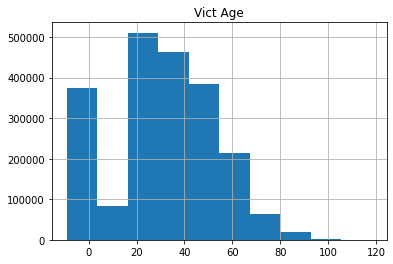

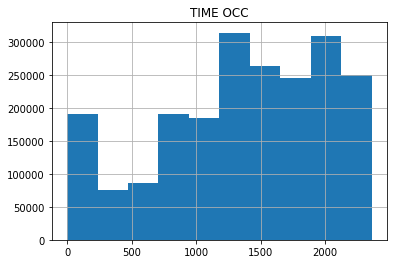

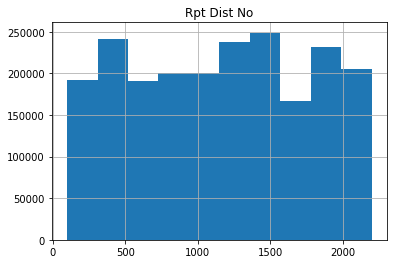

In [9]:
df.hist(column='Vict Age')
df.hist(column='TIME OCC')
df.hist(column='Rpt Dist No')


# Visualize important attributes
#### [15 points] Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

This is using 

In [11]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.lacity.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("63jg-8b9z", limit=5000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()

results_df['lat'] = results_df['lat'].astype(float)
results_df['lon'] = results_df['lon'].astype(float)

#results_df.lat = int(results_df.lat)
#results_df.lat = int(results_df.lon)

In [12]:

#create a geopandas dataframe and convert lat/long to point geometry:
geometry = [Point(xy) for xy in zip(results_df["lon"], results_df["lat"])]
geometry[:3]

In [13]:
#Tell it that we are using Lat/Long as our
crs = {'init': 'epsg:4326'}

geo_df = gpd.GeoDataFrame(results_df, crs = crs, geometry = geometry)
geo_df.head()

/Users/juliacodes/Documents/GitHub/MSDS-ML1-VisualizationAndDataProcessing/lacrime-env/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_1,location,lat,lon,cross_street,weapon_used_cd,weapon_desc,crm_cd_2,crm_cd_3,geometry
0,001307355,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,900,300 E GAGE AV,33.9825,-118.2695,NaN,NaN,NaN,NaN,NaN,POINT (-118.26950 33.98250)
1,011401303,2010-09-13T00:00:00.000,2010-09-12T00:00:00.000,0045,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740,SEPULVEDA BL,33.9599,-118.3962,MANCHESTER AV,NaN,NaN,NaN,NaN,POINT (-118.39620 33.95990)
2,070309629,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,946,1300 E 21ST ST,34.0224,-118.2524,NaN,NaN,NaN,NaN,NaN,POINT (-118.25240 34.02240)
3,090631215,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,0150,06,Hollywood,0646,2,900,VIOLATION OF COURT ORDER,...,900,CAHUENGA BL,34.1016,-118.3295,HOLLYWOOD BL,102,HAND GUN,998,NaN,POINT (-118.32950 34.10160)
4,100100501,2010-01-03T00:00:00.000,2010-01-02T00:00:00.000,2100,01,Central,0176,1,122,"RAPE, ATTEMPTED",...,122,8TH ST,34.0387,-118.2488,SAN PEDRO ST,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN,POINT (-118.24880 34.03870)


In [24]:
#This was just to limit data
#geo_400 = geo_df[geo_df['TIME OCC'] == 400].describe()
#geo_400 = geo_400[geo_df['LAT'] != 0].describe()
geo_df['weapon_used_cd'].notnull()

0       False
1       False
2       False
3        True
4        True
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: weapon_used_cd, Length: 5000, dtype: bool

Shape data from LA City Geo data
https://geohub.lacity.org/datasets/7835077624374b9fa65676443ba7a578_19

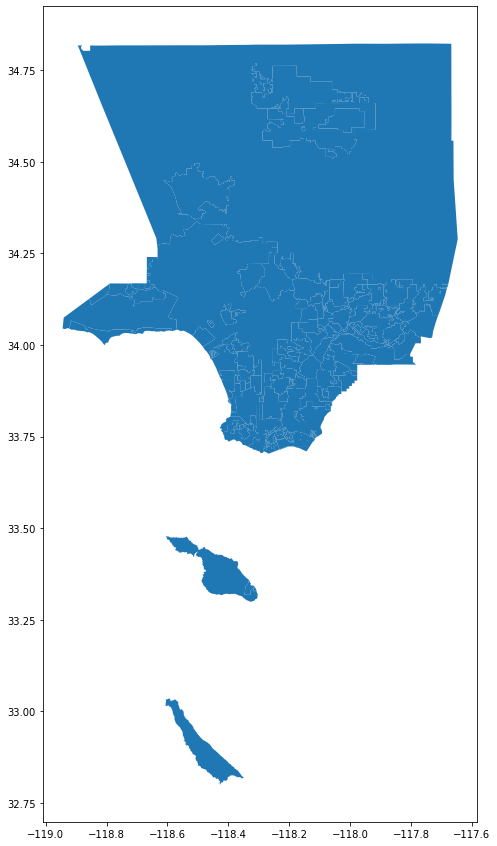

In [17]:
la_map = gpd.read_file('Data/shape/City_Boundaries.shp')
fig,ax = plt.subplots(figsize=(15,15))
la_map.plot(ax=ax)

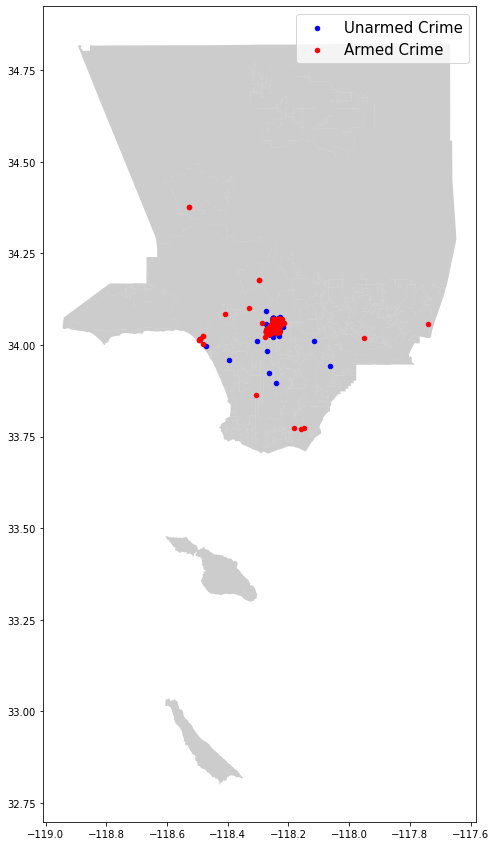

In [25]:
fig,ax = plt.subplots(figsize = (15,15))
la_map.plot(ax= ax, alpha = 0.4, color = "grey")
geo_df[geo_df['weapon_used_cd'].isnull()].plot(ax = ax, markersize = 20, color = "blue", marker = 'o', label = 'Unarmed Crime')
geo_df[geo_df['weapon_used_cd'].notnull()].plot(ax = ax, markersize = 20, color = "red", marker = 'o', label = 'Armed Crime')
plt.legend(prop={'size':15})

# Explore relationships between attributes
#### [15 points] Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.


Ideas
* (Age, Area)
* (Age, Crime Code)
* (Age, Gender)

# Explore relationships between features and response
#### [10 points] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).



So far interesting vars
* Victim Age
* LAT/Lon
* Area

# New Features
#### [5 points] Are there other features that could be added to the data or created from existing features? Which ones?



Ages bucketed
* Pre-school
* School-Age
* Early Twenties
* Late Twenties
* Thirties
* Fourties
* Fifties

Time to Report
* Time reported - Time Occurred

Mocodes
* Finding the most prevalent codes among the lists and dummy coding 

Weapon Noted
* Weapon Used - Not Reported

Number of Charges
* Crime code 1-4 Not null count

Reported as a Block
* Yes if Cross-street is null/blank

Time occurrence in relation to time of year
* Sunrise
* Day
* Sunset
* Evening

Parsed Date Data
* Month
* Year
* Day of Week

# Exceptional Work (10 points total)
###### • You have free reign to provide additional analyses.
###### • One idea: implement dimensionality reduction, then visualize and interpret the results.